<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_da/da19_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Python의 datetime 모듈
    *   datetime 클래스: 날짜(date), 시간(time)과 관련된 정보들을 저장, 표현할 수 있는 메서드를 포함.
    *   https://docs.python.org/3/library/datetime.html?highlight=datetime#module-datetime 참고

In [1]:
import datetime  # datetime 모듈을 import

In [2]:
datetime.datetime.now()
# datetime 모듈의 datetime 클래스의 now 메서드 호출

datetime.datetime(2021, 3, 3, 0, 41, 28, 595765)

In [3]:
from datetime import datetime  # datetime 모듈에서 작성된 datetime 클래스를 import

In [4]:
datetime.now()  # datetime 클래스의 now 메서드 호출

datetime.datetime(2021, 3, 3, 0, 41, 28, 621004)

*   datetime 클래스의 메서드

In [5]:
# datetime.now(): OS(운영체제)의 시간대에서의 현재 시간을 리턴.
now = datetime.now()  #> Google Colab 가상 머신에서 설정된 시간대(UTC)의 현재 시간
print(now)

2021-03-03 00:41:28.641508


*   UTC(Coordinates Universal Timezone): 그리니치 천문대 시간
*   KST(Korean Standard Timezone): 한국 표준시(UTC+09:00)

In [6]:
type(now)  #> datetime 모듈의 datetiem 클래스 객체(object)

datetime.datetime

In [7]:
# datetime.datetime 객체의 속성들(properties)
print(now.year)
print(now.month)
print(now.day)

2021
3
3


In [8]:
print(f'{now.hour}:{now.minute}:{now.second}')

0:41:28


In [9]:
# datetime 생성자 함수(constructor): 특정 날짜/시간으로 datetime 객체를 생성
yesterday = datetime(2021, 3, 1)
print(yesterday)

2021-03-01 00:00:00


In [10]:
tomorrow = datetime(2021, 3, 3, 14, 13)
print(tomorrow)

2021-03-03 14:13:00


In [11]:
# 두 날짜/시간 사이의 차(difference)
print(tomorrow - yesterday)

2 days, 14:13:00


In [12]:
from datetime import timedelta  # datetime 모듈의 timedelta 클래스를 import

In [13]:
current_time = datetime.now()
print(current_time)

2021-03-03 00:41:28.774347


In [14]:
one_week = timedelta(weeks=1)  # (1주일) 시간간격(timedelta) 객체 생성
print(current_time - one_week)
print(current_time + one_week)

2021-02-24 00:41:28.774347
2021-03-10 00:41:28.774347


In [15]:
one_day = timedelta(days=1)
print(current_time - one_day)
print(current_time + one_day)

2021-03-02 00:41:28.774347
2021-03-04 00:41:28.774347


*   datetime(날짜/시간) 객체 <---> str(문자열) 객체
    *   `datetime.strptime(문자열, 포맷문자열)`: 문자열(str)을 datetime 객체로 변환(parsing)
    *   `datetime.strftime(포맷문자열)`: datetime 객체를 문자열로 변환(formatting)


In [16]:
current_time = datetime.now()  # 현재 날짜/시간 정보를 저장하고 있는 datetime 객체 생성
print(current_time)
print(current_time.strftime('%Y/%m/%d'))  # datetime ---> str
print(current_time.strftime('%Y-%m-%d'))

2021-03-03 00:41:28.810212
2021/03/03
2021-03-03


*   날짜 포맷 문자열
    *   연도(year): %Y(4자리 연도),  %y(2자리 연도)
    *   월(month): %m(2자리 숫자), %B(월 이름), %b(월 이름 약자)
    *   일(day): %d(2자리 숫자)
    *   시(hour): %H(24시간 형식. 0 ~ 23), %I(12시간 형식. 1 ~ 12)
    *   분(minute): %M(2자리 숫자. 0 ~ 59)
    *   초(second): %S(2자리 숫자. 0 ~ 59)

In [17]:
print(current_time.strftime('%b. %d, %y'))
print(current_time.strftime('%B %d, %Y'))

Mar. 03, 21
March 03, 2021


In [18]:
current_time = datetime(2021, 3, 2, 15, 1, 30)
print(current_time.strftime('%H:%M:%S'))
print(current_time.strftime('%I:%M:%S %p'))

15:01:30
03:01:30 PM


In [50]:
# str ---> datetime
print(datetime.strptime('2021-3-2', '%Y-%m-%d'))
print(datetime.strptime('21-03-02', '%y-%m-%d'))
print(datetime.strptime('21-03-02', '%d-%m-%y'))

2021-03-02 00:00:00
2021-03-02 00:00:00
2002-03-21 00:00:00


*   timestamp(UNIX time, POSIX time, epoch time, ...): 1970년 1월 1일 0시 0분 0초를 시작으로 해서 1초마다 1씩 증가하는 숫자.
*   `datetime.timestamp()`: datetime 객체 ---> timestamp(숫자)
*   `datetime.fromtimestamp(숫자)`: timestamp(숫자) ---> datetime 객체


In [20]:
current_time = datetime.now()
print(current_time)
print(current_time.timestamp())  # datetime ---> 숫자

2021-03-03 00:41:28.862448
1614732088.862448


In [21]:
print(datetime.fromtimestamp(1614665900))  # 숫자 ---> datetime

2021-03-02 06:18:20


In [22]:
import pandas as pd

In [23]:
file_path = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/ratings.dat'
col_names = ['user_id', 'movie_id', 'rating', 'timestamp']

In [24]:
ratings = pd.read_csv(file_path, sep='::', header=None, names=col_names,
                      encoding='cp1252', engine='python')

In [25]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [26]:
datetime.fromtimestamp(978300760)

datetime.datetime(2000, 12, 31, 22, 12, 40)

In [27]:
# ratings 데이터 프레임에 dt 파생변수(timestamp 값을 datetime 객체로 변환한 값) 추가
dates = []  # timestamp(정수)를 datetime 객체로 변환한 값들을 저장할 리스트
for ts in ratings['timestamp']:
    dates.append(datetime.fromtimestamp(ts))

# 리스트 dates를 pd.Series로 변환해서 파생변수로 추가
ratings['dt'] = pd.Series(dates)  

In [28]:
ratings.head()

,user_id,movie_id,rating,timestamp,dt
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


In [29]:
ratings.tail()

,user_id,movie_id,rating,timestamp,dt
1000204,6040,1091,1,956716541,2000-04-26 02:35:41
1000205,6040,1094,5,956704887,2000-04-25 23:21:27
1000206,6040,562,5,956704746,2000-04-25 23:19:06
1000207,6040,1096,4,956715648,2000-04-26 02:20:48
1000208,6040,1097,4,956715569,2000-04-26 02:19:29


In [30]:
ratings['dt'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 1000209
unique                 458455
top       2000-11-29 20:06:42
freq                       30
first     2000-04-25 23:05:32
last      2003-02-28 17:49:50
Name: dt, dtype: object

In [31]:
# pd.to_datetime() 함수:
#   datetime.strptime() 메서드 또는 datetime.fromtimestamp() 메서드 기능을 활용해서
#   datetime 객체들의 Series를 만들어주는 함수.
ratings['dt2'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [32]:
ratings.head()

,user_id,movie_id,rating,timestamp,dt,dt2
0,1,1193,5,978300760,2000-12-31 22:12:40,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11,2001-01-06 23:38:11


In [33]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   user_id    1000209 non-null  int64         
 1   movie_id   1000209 non-null  int64         
 2   rating     1000209 non-null  int64         
 3   timestamp  1000209 non-null  int64         
 4   dt         1000209 non-null  datetime64[ns]
 5   dt2        1000209 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(4)
memory usage: 45.8 MB


In [34]:
# timestamp(정수) 타입을 datetime 타입으로 변환하는 목적은 년/월/일 등의 정보를 쉽게 추출하기 위해서
ratings['year'] = ratings['dt'].dt.year
ratings['month'] = ratings['dt'].dt.month
ratings['quarter'] = ratings['dt'].dt.quarter

In [35]:
ratings.head(10)

,user_id,movie_id,rating,timestamp,dt,dt2,year,month,quarter
0,1,1193,5,978300760,2000-12-31 22:12:40,2000-12-31 22:12:40,2000,12,4
1,1,661,3,978302109,2000-12-31 22:35:09,2000-12-31 22:35:09,2000,12,4
2,1,914,3,978301968,2000-12-31 22:32:48,2000-12-31 22:32:48,2000,12,4
3,1,3408,4,978300275,2000-12-31 22:04:35,2000-12-31 22:04:35,2000,12,4
4,1,2355,5,978824291,2001-01-06 23:38:11,2001-01-06 23:38:11,2001,1,1
5,1,1197,3,978302268,2000-12-31 22:37:48,2000-12-31 22:37:48,2000,12,4
6,1,1287,5,978302039,2000-12-31 22:33:59,2000-12-31 22:33:59,2000,12,4
7,1,2804,5,978300719,2000-12-31 22:11:59,2000-12-31 22:11:59,2000,12,4
8,1,594,4,978302268,2000-12-31 22:37:48,2000-12-31 22:37:48,2000,12,4
9,1,919,4,978301368,2000-12-31 22:22:48,2000-12-31 22:22:48,2000,12,4


In [36]:
# ratings 데이터 프레임에서 2003년도 1사분기 데이터만 추출
ratings[(ratings['year'] == 2003) & (ratings['quarter'] == 1)]

,user_id,movie_id,rating,timestamp,dt,dt2,year,month,quarter
8696,59,1175,4,1041967123,2003-01-07 19:18:43,2003-01-07 19:18:43,2003,1,1
8700,59,1252,4,1041967475,2003-01-07 19:24:35,2003-01-07 19:24:35,2003,1,1
8702,59,1183,4,1041963129,2003-01-07 18:12:09,2003-01-07 18:12:09,2003,1,1
8704,59,2997,4,1041962568,2003-01-07 18:02:48,2003-01-07 18:02:48,2003,1,1
8706,59,3871,4,1041968282,2003-01-07 19:38:02,2003-01-07 19:38:02,2003,1,1
...,...,...,...,...,...,...,...,...,...
984842,5950,3317,3,1046369439,2003-02-27 18:10:39,2003-02-27 18:10:39,2003,2,1
984847,5950,3328,3,1046369090,2003-02-27 18:04:50,2003-02-27 18:04:50,2003,2,1
984849,5950,111,5,1046368241,2003-02-27 17:50:41,2003-02-27 17:50:41,2003,2,1
984861,5950,3363,5,1046367948,2003-02-27 17:45:48,2003-02-27 17:45:48,2003,2,1


In [37]:
ratings[(ratings['dt'].dt.year == 2003) & 
        (ratings['dt'].dt.quarter == 1)]

,user_id,movie_id,rating,timestamp,dt,dt2,year,month,quarter
8696,59,1175,4,1041967123,2003-01-07 19:18:43,2003-01-07 19:18:43,2003,1,1
8700,59,1252,4,1041967475,2003-01-07 19:24:35,2003-01-07 19:24:35,2003,1,1
8702,59,1183,4,1041963129,2003-01-07 18:12:09,2003-01-07 18:12:09,2003,1,1
8704,59,2997,4,1041962568,2003-01-07 18:02:48,2003-01-07 18:02:48,2003,1,1
8706,59,3871,4,1041968282,2003-01-07 19:38:02,2003-01-07 19:38:02,2003,1,1
...,...,...,...,...,...,...,...,...,...
984842,5950,3317,3,1046369439,2003-02-27 18:10:39,2003-02-27 18:10:39,2003,2,1
984847,5950,3328,3,1046369090,2003-02-27 18:04:50,2003-02-27 18:04:50,2003,2,1
984849,5950,111,5,1046368241,2003-02-27 17:50:41,2003-02-27 17:50:41,2003,2,1
984861,5950,3363,5,1046367948,2003-02-27 17:45:48,2003-02-27 17:45:48,2003,2,1


In [38]:
file_path = 'https://github.com/wesm/pydata-book/raw/2nd-edition/examples/spx.csv'
spx = pd.read_csv(file_path, header=0, names=['Date', 'SPX'])
# hedaer=0: csv 파일의 첫번째 라인은 문서의 헤더(컬럼 이름 정보 등)
# names=[...]: 데이터 프레임의 컬럼 이름 설정

In [39]:
spx.head()

,Date,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75


In [40]:
spx.info()
#> spx['Date']: 문자열이 저장된 컬럼

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5472 non-null   object 
 1   SPX     5472 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.6+ KB


In [51]:
# spx['Date'] 컬럼을 datetime 타입으로 변환
# spx['Date'] = pd.to_datetime(spx['Date'], format='%Y-%m-%d %H:%M:%S')
spx['Date'] = pd.to_datetime(spx['Date'])

In [52]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   datetime64[ns]
 1   SPX     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


In [53]:
spx.head()

,Date,SPX
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75


In [44]:
# pd.read_csv()를 할 때, datetime으로 사용할 컬럼을 지정하는 방법:
spx2 = pd.read_csv(file_path, header=0, names=['date', 'spx'], 
                   parse_dates=['date'])
# parse_dates 파라미터: datetime 타입으로 변환할 컬럼들의 리스트

In [54]:
spx2.head()

,date,spx
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75


In [46]:
spx2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5472 non-null   datetime64[ns]
 1   spx     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


In [55]:
import matplotlib.pyplot as plt

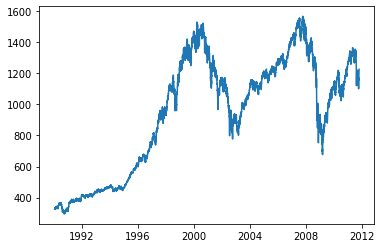

In [57]:
plt.plot(spx2['date'], spx2['spx'])
plt.show()

In [58]:
# spx2 데이터 프레임에 year 파생변수를 추가
spx2['year'] = spx2['date'].dt.year
spx2.head()

,date,spx,year
0,1990-02-01,328.79,1990
1,1990-02-02,330.92,1990
2,1990-02-05,331.85,1990
3,1990-02-06,329.66,1990
4,1990-02-07,333.75,1990


In [59]:
spx2.tail()

,date,spx,year
5467,2011-10-10,1194.89,2011
5468,2011-10-11,1195.54,2011
5469,2011-10-12,1207.25,2011
5470,2011-10-13,1203.66,2011
5471,2011-10-14,1224.58,2011


In [62]:
# spx2 데이터 프레임에서 연도별 spx의 평균
spx_by_year = spx2.groupby(by='year')['spx'].mean()
spx_by_year

year
1990     334.123506
1991     376.186324
1992     415.747008
1993     451.614822
1994     460.416508
1995     541.719087
1996     670.494843
1997     873.427787
1998    1085.503254
1999    1327.329563
2000    1427.221071
2001    1194.178992
2002     993.934802
2003     965.227540
2004    1130.649444
2005    1207.229444
2006    1310.461633
2007    1477.184343
2008    1220.042055
2009     948.046389
2010    1139.965516
2011    1276.093015
Name: spx, dtype: float64

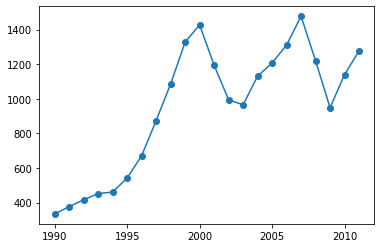

In [64]:
# 연도별 spx의 평균을 시각화
plt.plot(spx_by_year, 'o-')
plt.show()

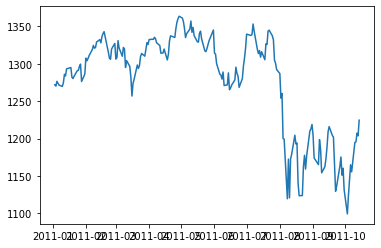

In [68]:
# 2011년도 자료만 시각화
spx2_2011 = spx2[spx2['year'] == 2011]

plt.plot(spx2_2011['date'], spx2_2011['spx'])
plt.show()

year  quarter
1990  1          334.751951
      2          349.796508
      3          335.881746
      4          316.562031
1991  1          352.282951
Name: spx, dtype: float64


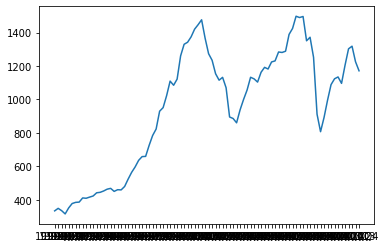

In [82]:
# 분기(quarter) 파생변수 추가
spx2['quarter'] = spx2['date'].dt.quarter

# 연도별, 분기별 spx의 평균 계산
spx_by_quarter = spx2.groupby(by=['year', 'quarter'])['spx'].mean()
print(spx_by_quarter.head())
#> multi-index

# 각 분기별 spx 평균 시각화
year_q = [str(y) + 'Q' + str(q) for y, q in spx_by_quarter.index]
plt.plot(year_q, spx_by_quarter)
plt.show()

*   datetime 타입의 컬럼을 index로 설정 ---> 편리한 샘플링(groupby와 유사)이 가능.

In [85]:
spx3 = spx2.set_index(keys='date')
spx3

,spx,year,quarter
date,,,
1990-02-01,328.79,1990,1
1990-02-02,330.92,1990,1
1990-02-05,331.85,1990,1
1990-02-06,329.66,1990,1
1990-02-07,333.75,1990,1
...,...,...,...
2011-10-10,1194.89,2011,4
2011-10-11,1195.54,2011,4
2011-10-12,1207.25,2011,4


In [86]:
spx3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   spx      5472 non-null   float64
 1   year     5472 non-null   int64  
 2   quarter  5472 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 171.0 KB


In [87]:
spx3.index

DatetimeIndex(['1990-02-01', '1990-02-02', '1990-02-05', '1990-02-06',
               '1990-02-07', '1990-02-08', '1990-02-09', '1990-02-12',
               '1990-02-13', '1990-02-14',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', name='date', length=5472, freq=None)

In [97]:
spx2.groupby(by='year')['spx'].mean()

year
1990     334.123506
1991     376.186324
1992     415.747008
1993     451.614822
1994     460.416508
1995     541.719087
1996     670.494843
1997     873.427787
1998    1085.503254
1999    1327.329563
2000    1427.221071
2001    1194.178992
2002     993.934802
2003     965.227540
2004    1130.649444
2005    1207.229444
2006    1310.461633
2007    1477.184343
2008    1220.042055
2009     948.046389
2010    1139.965516
2011    1276.093015
Name: spx, dtype: float64

In [98]:
# 연도별 spx의 평균
spx3.resample('Y', kind='period')['spx'].mean()

date
1990     334.123506
1991     376.186324
1992     415.747008
1993     451.614822
1994     460.416508
1995     541.719087
1996     670.494843
1997     873.427787
1998    1085.503254
1999    1327.329563
2000    1427.221071
2001    1194.178992
2002     993.934802
2003     965.227540
2004    1130.649444
2005    1207.229444
2006    1310.461633
2007    1477.184343
2008    1220.042055
2009     948.046389
2010    1139.965516
2011    1276.093015
Freq: A-DEC, Name: spx, dtype: float64

In [100]:
spx2.groupby(by=['year', 'quarter'])['spx'].mean()

year  quarter
1990  1           334.751951
      2           349.796508
      3           335.881746
      4           316.562031
1991  1           352.282951
                    ...     
2010  4          1204.585625
2011  1          1302.529032
      2          1318.332857
      3          1225.268437
      4          1171.356000
Name: spx, Length: 88, dtype: float64

In [108]:
# 분기별 spx의 평균
s = spx3.resample('Q')['spx'].mean()
s

date
1990-03-31     334.751951
1990-06-30     349.796508
1990-09-30     335.881746
1990-12-31     316.562031
1991-03-31     352.282951
                 ...     
2010-12-31    1204.585625
2011-03-31    1302.529032
2011-06-30    1318.332857
2011-09-30    1225.268437
2011-12-31    1171.356000
Freq: Q-DEC, Name: spx, Length: 88, dtype: float64

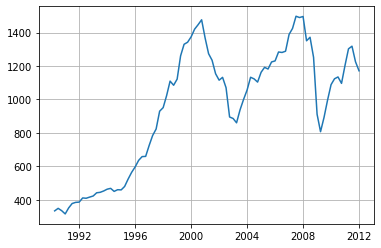

In [109]:
# s.index
plt.plot(s)
plt.grid()
plt.show()

*   대기중 $NO_2$의 농도 측정 자료

In [110]:
no2_file = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_no2_long.csv'

In [122]:
# csv 파일을 읽고 데이터 프레임 생성
air_quality = pd.read_csv(no2_file)

In [123]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [124]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [125]:
# pd.read_csv() 함수는 기본 동작은 날짜/시간 형식의 문자열을 문자열(object) 타입 변수(컬럼)로 만듦.
# -> 시계열 데이터로 분석하기 위해서는 문자열 타입을 날짜/시간 타입으로 변환할 필요가 있음.
air_quality['date.utc'] = pd.to_datetime(air_quality['date.utc'])

In [126]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB


In [127]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [128]:
air_quality['date.utc'].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [129]:
air_quality['date.utc'].max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

In [130]:
# datetime 타입의 컬럼(date.utc)을 인덱스로 설정 ---> resample() 메서드 사용 가능.
air_quality = air_quality.set_index(keys='date.utc')

In [131]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


In [136]:
# pd.read_csv() ---> df.to_datetime() ---> df.set_index()
air_quality = pd.read_csv(no2_file, parse_dates=['date.utc'], index_col='date.utc')

In [137]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2068 entries, 2019-06-21 00:00:00+00:00 to 2019-05-07 01:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   location   2068 non-null   object 
 3   parameter  2068 non-null   object 
 4   value      2068 non-null   float64
 5   unit       2068 non-null   object 
dtypes: float64(1), object(5)
memory usage: 113.1+ KB


In [138]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


In [139]:
# air_quality 데이터 프레임: date.utc를 datetime 타입의 컬럼으로
air_quality = pd.read_csv(no2_file, parse_dates=['date.utc'])

# air_quality2 데이터 프레임: date.utc를 DatetimeIndex 타입의 인덱스로
air_quality2 = pd.read_csv(no2_file, parse_dates=['date.utc'], index_col='date.utc')

In [140]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [141]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB


In [142]:
air_quality2

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...
2019-05-07 06:00:00+00:00,London,GB,London Westminster,no2,26.0,µg/m³
2019-05-07 04:00:00+00:00,London,GB,London Westminster,no2,16.0,µg/m³
2019-05-07 03:00:00+00:00,London,GB,London Westminster,no2,19.0,µg/m³


In [143]:
air_quality2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2068 entries, 2019-06-21 00:00:00+00:00 to 2019-05-07 01:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   location   2068 non-null   object 
 3   parameter  2068 non-null   object 
 4   value      2068 non-null   float64
 5   unit       2068 non-null   object 
dtypes: float64(1), object(5)
memory usage: 113.1+ KB


In [144]:
air_quality['city'].value_counts()

Paris        1004
London        969
Antwerpen      95
Name: city, dtype: int64

In [145]:
air_quality['country'].value_counts()

FR    1004
GB     969
BE      95
Name: country, dtype: int64

In [146]:
air_quality['location'].value_counts()

FR04014               1004
London Westminster     969
BETR801                 95
Name: location, dtype: int64

In [147]:
air_quality['parameter'].value_counts()

no2    2068
Name: parameter, dtype: int64

In [148]:
air_quality['unit'].value_counts()

µg/m³    2068
Name: unit, dtype: int64

In [149]:
air_quality['value'].describe()

count    2068.000000
mean       26.261847
std        13.479451
min         0.000000
25%        17.000000
50%        25.000000
75%        33.000000
max        97.000000
Name: value, dtype: float64

In [155]:
air_quality['date.utc'].dt.year.unique()

array([2019])

In [157]:
air_quality['date.utc'].dt.month.unique()

array([6, 5])

In [158]:
air_quality['date.utc'].dt.day.unique()

array([21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,
        4,  3,  2,  1, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22])

In [159]:
air_quality['date.utc'].dt.hour.unique()

array([ 0, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 10,  9,  8,  7,  6,
        5,  4,  3,  2,  1, 12, 11])

In [160]:
air_quality['date.utc'].dt.weekday.unique()
#> 0(월요일) ~ 6(일요일)

array([4, 3, 2, 1, 0, 6, 5])

In [163]:
# 하루 중 어느 시간대에서 NO2의 농도가 평균적으로 높을까?
# 시간대별 도시별 NO2의 평균 시각화
air_quality.groupby(by=[air_quality['date.utc'].dt.hour, 'city'])['value'].mean()

date.utc  city     
0         Antwerpen    24.750000
          London       24.292683
          Paris        31.683333
1         Antwerpen    25.838235
          London       24.757576
                         ...    
22        London       28.969697
          Paris        35.400000
23        Antwerpen    23.000000
          London       28.414634
          Paris        34.288095
Name: value, Length: 72, dtype: float64

In [167]:
no2_by_hour = air_quality.pivot_table(values='value',
                                      index=air_quality['date.utc'].dt.hour,
                                      columns='city')

In [168]:
no2_by_hour

city,Antwerpen,London,Paris
date.utc,,,
0,24.750000,24.292683,31.683333
1,25.838235,24.757576,27.433333
2,21.000000,21.800000,25.964286
3,21.333333,21.536585,25.234211
4,24.833333,18.976190,27.257895
5,29.500000,19.048780,35.534211
6,33.333333,20.976190,40.102381
7,37.666667,21.452381,40.569767
8,34.833333,21.238095,36.458140


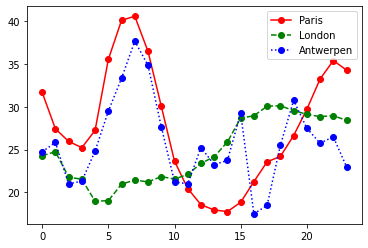

In [173]:
plt.plot(no2_by_hour['Paris'], 'ro-', label='Paris')
plt.plot(no2_by_hour['London'], 'go--', label='London')
plt.plot(no2_by_hour['Antwerpen'], 'bo:', label='Antwerpen')

plt.legend()
plt.show()

In [175]:
# 일주일 중 어느 요일이 NO2의 농도가 평균적으로 높을까?
# 요일별 도시별 NO2의 평균 시각화
air_quality.groupby(by=[air_quality['date.utc'].dt.weekday, 'city'])['value'].mean().unstack()

city,Antwerpen,London,Paris
date.utc,,,
0,27.875000,23.969697,24.856250
1,22.214286,24.885714,30.999359
2,21.125000,23.460432,29.165753
3,27.500000,24.780142,28.600690
4,28.400000,26.446809,31.617986
5,33.500000,24.977612,25.266154
6,21.896552,24.859155,23.274306


In [176]:
no2_by_weekday = air_quality.pivot_table(values='value',
                                         index=air_quality['date.utc'].dt.weekday,
                                         columns='city')
no2_by_weekday

city,Antwerpen,London,Paris
date.utc,,,
0,27.875000,23.969697,24.856250
1,22.214286,24.885714,30.999359
2,21.125000,23.460432,29.165753
3,27.500000,24.780142,28.600690
4,28.400000,26.446809,31.617986
5,33.500000,24.977612,25.266154
6,21.896552,24.859155,23.274306


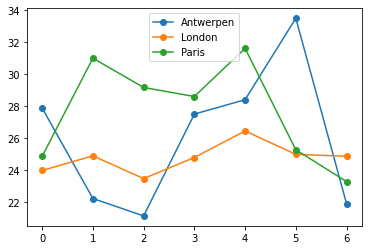

In [178]:
plt.plot(no2_by_weekday['Antwerpen'], 'o-', label='Antwerpen')
plt.plot(no2_by_weekday['London'], 'o-', label='London')
plt.plot(no2_by_weekday['Paris'], 'o-', label='Paris')

plt.legend()
plt.show()

In [183]:
# air_quality2 데이터 프레임의 DatetimeIndex를 사용해서 slicing, 부분집합
air_quality2.index

DatetimeIndex(['2019-06-21 00:00:00+00:00', '2019-06-20 23:00:00+00:00',
               '2019-06-20 22:00:00+00:00', '2019-06-20 21:00:00+00:00',
               '2019-06-20 20:00:00+00:00', '2019-06-20 19:00:00+00:00',
               '2019-06-20 18:00:00+00:00', '2019-06-20 17:00:00+00:00',
               '2019-06-20 16:00:00+00:00', '2019-06-20 15:00:00+00:00',
               ...
               '2019-05-07 11:00:00+00:00', '2019-05-07 10:00:00+00:00',
               '2019-05-07 09:00:00+00:00', '2019-05-07 08:00:00+00:00',
               '2019-05-07 07:00:00+00:00', '2019-05-07 06:00:00+00:00',
               '2019-05-07 04:00:00+00:00', '2019-05-07 03:00:00+00:00',
               '2019-05-07 02:00:00+00:00', '2019-05-07 01:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date.utc', length=2068, freq=None)

In [184]:
air_quality2.index.max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

In [182]:
air_quality2.index.min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [191]:
air_quality2.loc['2019-05-20':'2019-05-20']  # 하루 데이터 선택

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-05-20 23:00:00+00:00,Paris,FR,FR04014,no2,19.6,µg/m³
2019-05-20 22:00:00+00:00,Paris,FR,FR04014,no2,20.7,µg/m³
2019-05-20 21:00:00+00:00,Paris,FR,FR04014,no2,20.3,µg/m³
2019-05-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.6,µg/m³
2019-05-20 19:00:00+00:00,Paris,FR,FR04014,no2,21.3,µg/m³
...,...,...,...,...,...,...
2019-05-20 04:00:00+00:00,London,GB,London Westminster,no2,26.0,µg/m³
2019-05-20 03:00:00+00:00,London,GB,London Westminster,no2,32.0,µg/m³
2019-05-20 02:00:00+00:00,London,GB,London Westminster,no2,32.0,µg/m³


In [192]:
air_quality2.loc['2019-05':'2019-05']  # 2019년 5월 데이터 선택

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-05-31 23:00:00+00:00,Paris,FR,FR04014,no2,81.7,µg/m³
2019-05-31 22:00:00+00:00,Paris,FR,FR04014,no2,68.0,µg/m³
2019-05-31 21:00:00+00:00,Paris,FR,FR04014,no2,60.2,µg/m³
2019-05-31 20:00:00+00:00,Paris,FR,FR04014,no2,37.0,µg/m³
2019-05-31 19:00:00+00:00,Paris,FR,FR04014,no2,23.3,µg/m³
...,...,...,...,...,...,...
2019-05-07 06:00:00+00:00,London,GB,London Westminster,no2,26.0,µg/m³
2019-05-07 04:00:00+00:00,London,GB,London Westminster,no2,16.0,µg/m³
2019-05-07 03:00:00+00:00,London,GB,London Westminster,no2,19.0,µg/m³


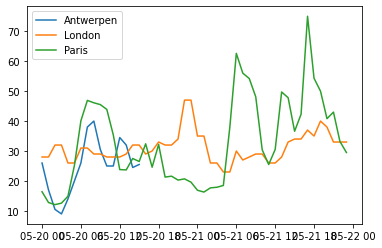

In [196]:
# 2019년 5월 20일 0시 ~ 2019년 5월 21일 23시 데이터를 도시별 선그래프
subset = air_quality2.loc['2019-05-20':'2019-05-21']
pivoted = subset.pivot(columns='city', values='value')

plt.plot(pivoted['Antwerpen'], label='Antwerpen')
plt.plot(pivoted['London'], label='London')
plt.plot(pivoted['Paris'], label='Paris')

plt.legend()
plt.show()

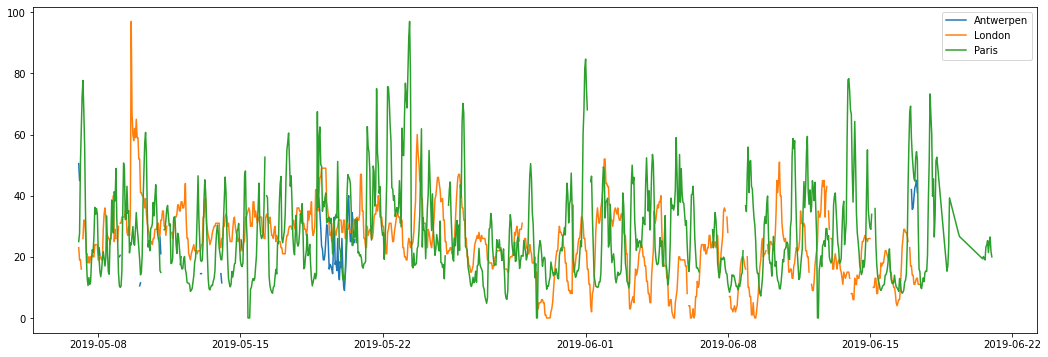

In [204]:
# 전체 기간동안 도시별 시계열 그래프
no2_by_city = air_quality2.pivot(columns='city', values='value')

plt.figure(figsize=(18, 6))

plt.plot(no2_by_city['Antwerpen'], label='Antwerpen')
plt.plot(no2_by_city['London'], label='London')
plt.plot(no2_by_city['Paris'], label='Paris')

plt.legend()
plt.show()

In [205]:
# no2_by_city 데이터 프레임을 사용해서 일주일 단위로 각 도시의 NO2 최댓값

city,Antwerpen,London,Paris
date.utc,,,
2019-05-07 01:00:00+00:00,50.5,23.0,25.0
2019-05-07 02:00:00+00:00,45.0,19.0,27.7
2019-05-07 03:00:00+00:00,NaN,19.0,50.4
2019-05-07 04:00:00+00:00,NaN,16.0,61.9
2019-05-07 05:00:00+00:00,NaN,NaN,72.4
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,NaN,21.4
2019-06-20 21:00:00+00:00,NaN,NaN,24.9
2019-06-20 22:00:00+00:00,NaN,NaN,26.5


In [ ]:
# no2_by_city 데이터 프레임을 사용해서 일별 각 도시의 NO2 최댓값